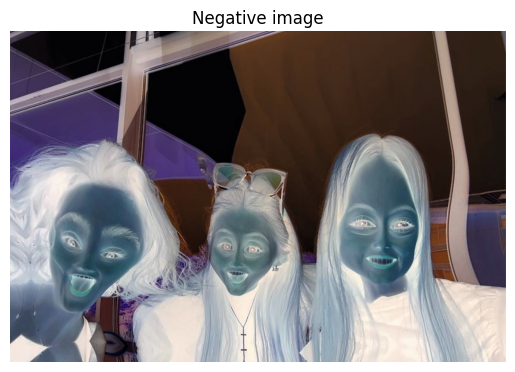

Execution time: 0.504846 seconds


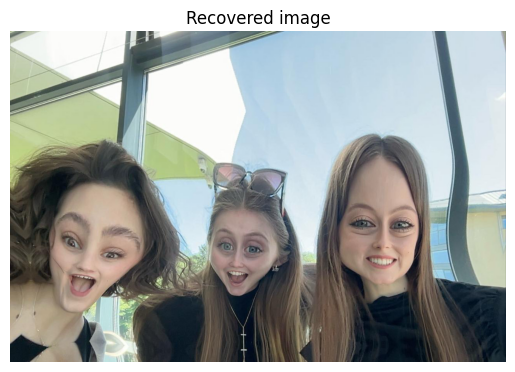

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

def gauss_jordan_inverse(matrix):
    n = len(matrix)
    augmented = [row[:] + [float(i == j) for j in range(n)] for i, row in enumerate(matrix)]

    for i in range(n):
        pivot = augmented[i][i]
        if pivot == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")

        for j in range(2 * n):
            augmented[i][j] /= pivot

        for k in range(n):
            if k != i:
                factor = augmented[k][i]
                for j in range(2 * n):
                    augmented[k][j] -= factor * augmented[i][j]

    inverse = [row[n:] for row in augmented]
    return inverse

T = [
    [-1, 0, 0, 255],
    [0, -1, 0, 255],
    [0, 0, -1, 255],
    [0, 0, 0, 1]
]

T_inv = gauss_jordan_inverse(T)
T_inv = np.array(T_inv)

def restore_image(negative_img):
    img = negative_img.astype(np.float32)

    h, w, _ = img.shape
    ones = np.ones((h, w, 1), dtype=np.float32)
    img_homogeneous = np.concatenate((img, ones), axis=2)

    img_reshaped = img_homogeneous.reshape(-1, 4).T
    restored = np.matmul(T_inv, img_reshaped)

    restored = restored[:3, :].T.reshape(h, w, 3)
    restored = np.clip(restored, 0, 255).astype(np.uint8)

    return restored

def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()


input_path = 'negative.PNG'  
negative_img = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

if negative_img is None:
    print("Error")
else:
    if negative_img.shape[2] == 4:
        negative_img = negative_img[:, :, :3]

    show_image(negative_img, "Negative image")

    start_time = time.time()
    restored_img = restore_image(negative_img)
    end_time = time.time()

    print(f"Execution time: {end_time - start_time:.6f} seconds")

    show_image(restored_img, "Recovered image")

    output_path = 'restored_image.png'
    cv2.imwrite(output_path, restored_img)
